# The Spark Foundation #GRIPJUNE2021

# Task 6 - Prediction using Decision Tree Algorithm
● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.
- Dataset : https://bit.ly/3kXTdox

# By :- Shruti Dhawle-(Data Science & Business Analytics)

# Importing Packages

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Loading the iris dataset

In [93]:
iris=datasets.load_iris()

# Forming the iris dataframe

In [95]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Exploratory data analysis 

In [96]:
x.shape

(150, 6)

In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [98]:
x.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [99]:
x.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [100]:
col_names = x.columns
col_names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [101]:
x.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Frequency distribution of values in variables

In [102]:
col_names = ['Id','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

for col in col_names:
    
    print(x[col].value_counts())

1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 150, dtype: int64
5.0    10
6.3     9
5.1     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
6.2     4
5.2     4
7.7     4
6.9     4
4.6     4
7.2     3
5.9     3
4.4     3
6.8     3
6.6     2
4.7     2
7.1     1
7.4     1
7.6     1
7.9     1
4.5     1
7.0     1
5.3     1
7.3     1
4.3     1
Name: SepalLengthCm, dtype: int64
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.8     6
3.5     6
3.3     6
2.6     5
2.3     4
2.2     3
2.4     3
3.6     3
3.7     3
3.9     2
4.4     1
2.0     1
4.0     1
4.2     1
4.1     1
Name: SepalWidthCm, dtype: int64
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.0     5
4.9     5
4.7     5
5.0     4
1.7     4
4.8     4
4.4     4
4.2     4
4.1     3
5.7     3
5.5     3
6.1     3
3.9     3
4.6     3
5.8     

#### We can see that there are no missing values in the dataset. I have checked the frequency distribution of values. 

# Building Classification Model

In [120]:
# Importing few libraries for creating Decison Tree Classifier and Visualixing Tree Structure
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# here we are separating independent variables or target variables from Iris Dataset..
y=iris.target
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Split data into separate training and test set

In [121]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [122]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((100, 4), (50, 4))

In [123]:
# check data types in X_train

X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [124]:
X_train.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
67,5.8,2.7,4.1,1.0
28,5.2,3.4,1.4,0.2
40,5.0,3.5,1.3,0.3
44,5.1,3.8,1.9,0.4
60,5.0,2.0,3.5,1.0


In [125]:
X_test.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


# Import the DecisionTreeClassifier and fit the model

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


print('Decision Tree Classifer Created Successfully')

Decision Tree Classifer Created Successfully


In [127]:
y_predict = dtree.predict(X_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

# Constructing Decision Tree using matplotlib.pyplot

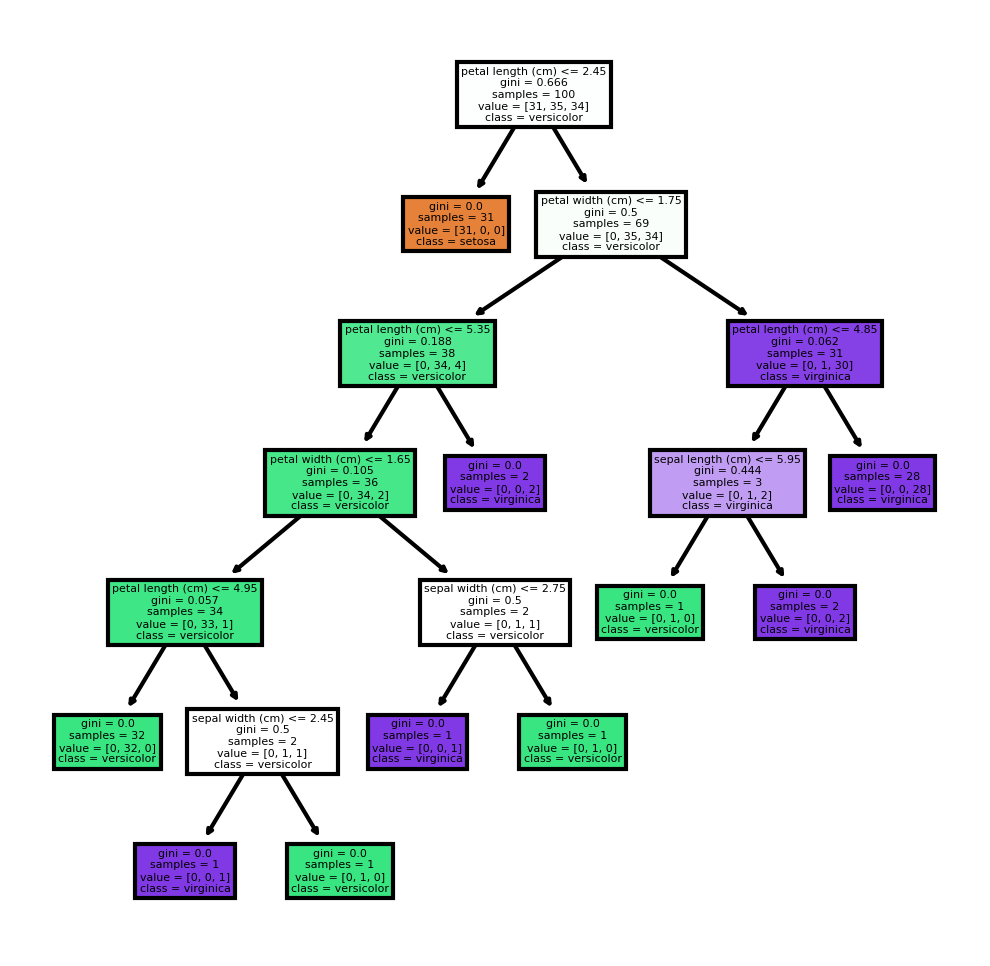

In [128]:
import matplotlib.pyplot as plt
from sklearn import tree


a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);

### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.

###  As our model has been trained….
###  Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

In [130]:
print('accuracy score is:', cross_val_score(dtree, X_train, y_train, cv=3, scoring='accuracy').mean())

accuracy score is: 0.9099821746880571


# Checking Validation test data on our trained model and getting performance metrics

In [131]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat =dtree.predict(X_test)
print("accuracy score for validation test data is:",accuracy_score(y_test,Y_hat))
multilabel_confusion_matrix(y_test,Y_hat)

accuracy score for validation test data is: 0.98


array([[[31,  0],
        [ 0, 19]],

       [[34,  1],
        [ 0, 15]],

       [[34,  0],
        [ 1, 15]]], dtype=int64)

# Classification Report

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# THANK YOU :)